In [1]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
import tensorflow as tf
from NN_learn import *

from tensorflow.keras.layers import Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

from tensorflow.keras import layers
from tensorflow import keras

def swish(x):
    return x * K.sigmoid(x)

get_custom_objects().update({'swish': Activation(swish)})


Using TensorFlow backend.


In [2]:
samples =  np.loadtxt( "samples.csv" ).T
N=samples.shape[1]
print(samples.shape)



(1000000, 15)


In [3]:


schedule =  tf.keras.optimizers.schedules.InverseTimeDecay(
0.01,   decay_steps= 5000,
decay_rate=1)
width=15

model = tf.keras.Sequential()



model.add(layers.Dense(width,activation=swish, input_shape=(N-1,), kernel_initializer= keras.initializers.Zeros(),
                       kernel_regularizer=keras.regularizers.l1(l=0.003)))


model.add(layers.Dense(width, activation=swish, kernel_regularizer=keras.regularizers.l1(l=0.00)))


#model.add(layers.Dense(width, activation=swish, kernel_regularizer=keras.regularizers.l1(l=0.000)))

#model.add(layers.Dense(width, activation=swish, kernel_regularizer=keras.regularizers.l1(l=0.00)))

model.add(layers.Dense(1))
model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                225       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [5]:
H =  train_NN_ising(samples, model, 150,batch_size =5000, eta= schedule)

Learning variable: 0
Train on 1000000 samples
Epoch 1/10
1000000/1000000 [==============================] - 2s 2us/sample - loss: 0.4359
Epoch 2/10
1000000/1000000 [==============================] - 1s 1us/sample - loss: 0.3953
Epoch 3/10
1000000/1000000 [==============================] - 1s 1us/sample - loss: 0.3895
Epoch 4/10
1000000/1000000 [==============================] - 1s 1us/sample - loss: 0.3878
Epoch 5/10
1000000/1000000 [==============================] - 1s 1us/sample - loss: 0.3876
Epoch 6/10
1000000/1000000 [==============================] - 1s 1us/sample - loss: 0.3870
Epoch 7/10
1000000/1000000 [==============================] - 1s 1us/sample - loss: 0.3866
Epoch 8/10
1000000/1000000 [==============================] - 1s 1us/sample - loss: 0.3854
Epoch 9/10
1000000/1000000 [==============================] - 1s 1us/sample - loss: 0.3849
Epoch 10/10
1000000/1000000 [==============================] - 1s 1us/sample - loss: 0.3849
Learning variable: 1
Train on 1000000 sampl

1000000/1000000 [==============================] - 1s 1us/sample - loss: 0.4694
Epoch 7/10
1000000/1000000 [==============================] - 1s 1us/sample - loss: 0.4682
Epoch 8/10
1000000/1000000 [==============================] - 1s 1us/sample - loss: 0.4675
Epoch 9/10
1000000/1000000 [==============================] - 1s 1us/sample - loss: 0.4664
Epoch 10/10
1000000/1000000 [==============================] - 1s 1us/sample - loss: 0.4639
Learning variable: 9
Train on 1000000 samples
Epoch 1/10
1000000/1000000 [==============================] - 1s 1us/sample - loss: 0.5923
Epoch 2/10
1000000/1000000 [==============================] - 1s 1us/sample - loss: 0.5684
Epoch 3/10
1000000/1000000 [==============================] - 1s 1us/sample - loss: 0.5661
Epoch 4/10
1000000/1000000 [==============================] - 1s 1us/sample - loss: 0.5656
Epoch 5/10
1000000/1000000 [==============================] - 1s 1us/sample - loss: 0.5647
Epoch 6/10
1000000/1000000 [==========================

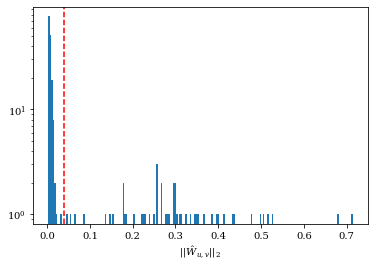

In [9]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

wt_list = []
e_list = []

for u in range(1,N+1):
    for j in range(1 , N):
        v =  j if j < u else j+1
        W_u_v =  np.linalg.norm( H[u-1].trainable_variables[0][j-1,:].numpy() , ord=2)
        edge = (u,v) if u<v else (v,u)
        wt_list.append(W_u_v)
        e_list.append(edge)
        

plt.hist(wt_list, 200)

#This is the threshold for structure learning 
threshold = 0.04
####

plt.axvline(x=threshold, color='red', ls='--')

plt.yscale('log')
plt.xlabel(r"$|| \hat{W}_{u,v}||_2$")
plt.savefig("weights_hist_hyper.pdf")
plt.show()
        
        
        
        
        
            
    

In [10]:


#Creating a position object from a circular graph to make the visualization of the reconstruction simpler


edge_list = [(i, i+1) for  i in range(1,N)]
edge_list.append((1,N))

G =  nx.Graph()
G.add_edges_from(edge_list)
pos =  nx.circular_layout(G)





/home/abhijith/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


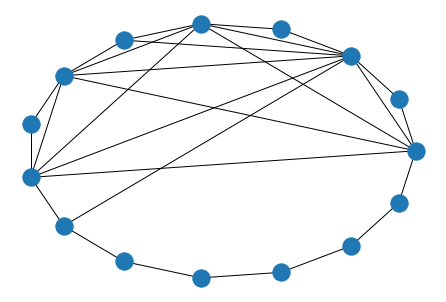

In [11]:
estim_edges = []
for i,e  in enumerate(e_list):
    if wt_list[i] >  threshold:
        estim_edges.append(e)
G_estim = nx.Graph()

G_estim.add_edges_from(estim_edges)
nx.draw(G_estim,pos)
#plt.savefig("reconstructed_hyper.pdf")


